In [1]:
from random import seed, randrange, random, shuffle
import math
import matplotlib.pyplot as plt
import torch, os
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.io import read_image
from tqdm import tqdm
import numpy as np
from abc import ABC, abstractmethod
from PIL import ImageColor, Image
seed(0)

In [2]:
from image_dataset import ImageDataset
from mask_transforms import RandomBorderMaskTransform, ApplyMaskTransform, MaskedAreaTransform
from config import config
from util import Util as u

entropy_ordered_filepaths = ImageDataset.load_filepaths('../entropy-filepaths-ordered.txt', prefix='../')
img_dataset = ImageDataset(filepaths=entropy_ordered_filepaths, shuffle=True,
                          both=transforms.Compose([
                              transforms.RandomHorizontalFlip(),
                              transforms.ToTensor(),
                              RandomBorderMaskTransform(config)]),
                          xonly=ApplyMaskTransform(config),
                          yonly=MaskedAreaTransform(config)) 

train_loader = torch.utils.data.DataLoader(img_dataset, batch_size=24)
i, (X, y) = next(enumerate(train_loader))

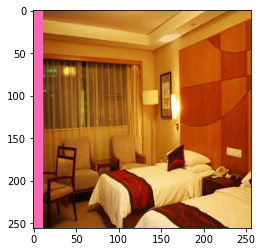

In [3]:
u.show(X[0])

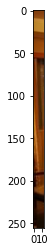

In [4]:
u.show(y[0])

In [14]:
from blocks import UNET

unet = UNET(config)